<a href="https://colab.research.google.com/github/crazymarmot/sf_data_sience/blob/main/PROJECT_6__%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Сегментация клиентов онлайн магазина подарков



## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе.

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(0)

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/pynvml.py", line 2415, in _LoadNvmlLibrary
    nvmlLib = CDLL("libnvidia-ml.so.1")
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: libnvidia-ml.so.1: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 17, in <module>
    pynvml.nvmlInit()
  File "/usr/local/lib/python3.11/site-packages/pynvml.py", line 2387, in nvmlInit
    nvmlInitWithFlags(0)
  File "/usr/local/lib/python3.11/site-packages/pynvml.py", line 2370, in nvmlInitWithFlags
    _LoadNvmlLibrary()
  File "/usr/local/lib

In [1]:
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

In [3]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import umap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score




import warnings
from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [ ]:
data = pd.read_csv(
    "/content/data.csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [ ]:
#Необходимо проверить пропуски на процент в каждом столбце. Удаление болле 30% наблюдений не желательна.
nan_rows = data.isna().sum()/len(data)
print(f'Процент пропусков ы каждом столбце:\n {nan_rows}')
data = data.dropna(subset='CustomerID')
data.info()

Процент пропусков ы каждом столбце:
 InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [ ]:
duplicates = data[data.duplicated(subset=data.columns)]
data = data.drop_duplicates()
print(duplicates.shape[0])

0


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [ ]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [ ]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов.
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) &
                       (data['InvoiceDate'] < col['InvoiceDate']) &
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1):
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1):
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']:
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [ ]:
num_missing_contragents = data['QuantityCanceled'].isna().sum()
print(f'Количество транзакций без контрагентов: {num_missing_contragents}')

data = data.dropna(subset=['QuantityCanceled'])

Количество транзакций без контрагентов: 1303


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400301 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         400301 non-null  object        
 1   StockCode         400301 non-null  object        
 2   Description       400301 non-null  object        
 3   Quantity          400301 non-null  int64         
 4   InvoiceDate       400301 non-null  datetime64[ns]
 5   UnitPrice         400301 non-null  float64       
 6   CustomerID        400301 non-null  object        
 7   Country           400301 non-null  object        
 8   QuantityCanceled  400301 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.5+ MB


Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [ ]:
data.shape

(400301, 9)

#### 2.1.4. Специализированные транзакции

In [ ]:

# Фильтруем специальные коды товаров, начинающиеся с букв
special_transactions = data[data['StockCode'].str.match(r'^[a-zA-Z]+', na=False)]

# Выводим уникальные специальные коды для анализа
print(f"Специальные транзакции, начинающиеся со слов: {special_transactions['StockCode'].unique()}")

# Удаляем строки с особыми кодами из исходного DataFrame
data = data[~data['StockCode'].str.match(r'^[a-zA-Z]+', na=False)]

# Проверяем результат
print(data.shape)


Специальные транзакции, начинающиеся со слов: ['POST' 'C2' 'M' 'BANK CHARGES' 'PADS' 'DOT']
(398661, 9)


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [ ]:
data = data[~(data['UnitPrice']==0)]
# Проверяем,что мы удалили верные строки и проверяем на минималльное значение в столбце
print(data['UnitPrice'].min())
# Проверяеем также рамерность
print(data.shape)

0.04
(398628, 9)


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:

 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [ ]:
data['TotalPrice']= data['UnitPrice']*(data['Quantity']-data['QuantityCanceled'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


In [ ]:
# Проверяю строки с отменеными товарами на правильность калькуляции столбца 'TotalPrice'
filtered_data = data[data['QuantityCanceled'] > 0][['UnitPrice', 'Quantity', 'QuantityCanceled', 'TotalPrice']]
print(filtered_data)


        UnitPrice  Quantity  QuantityCanceled  TotalPrice
65          10.95        32              12.0      219.00
96           0.42       120               2.0       49.56
98           0.55        24               1.0       12.65
99           0.55        24              27.0       -1.65
139          1.06        36               3.0       34.98
...           ...       ...               ...         ...
534689       5.95         1               1.0        0.00
534720       8.95         1               1.0        0.00
537596       0.42       100             100.0        0.00
537597       0.42        25              25.0        0.00
540421       2.08     80995           80995.0        0.00

[7138 rows x 4 columns]


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [ ]:
data.to_csv('cleared_data.csv', index=False, encoding='utf-8')

In [ ]:
from google.colab import files
files.download('cleared_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv(
    "/content/cleared_data (1).csv",
    encoding="ISO-8859-1",
    dtype={'CustomerID': str, 'InvoiceID': str},
    parse_dates=['InvoiceDate']  # Преобразуем дату при загрузке
)


print('Data shape: {}'.format(data.shape))
display(data.head(5))

Data shape: (398628, 10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)?

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



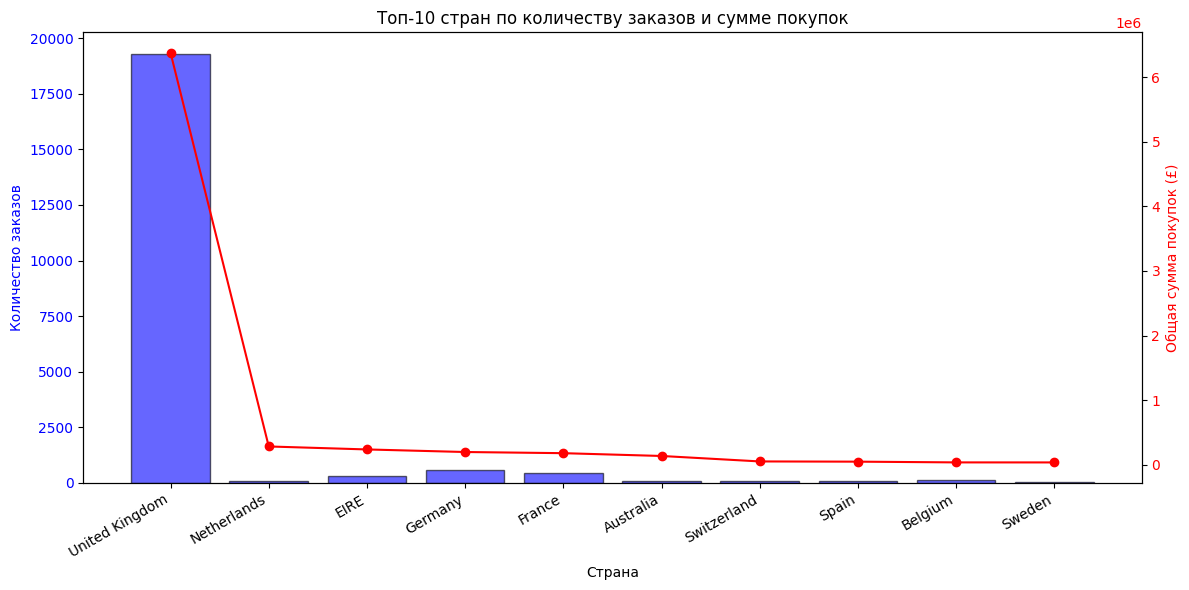

In [5]:
#Клиенты из каких стран покупают больше и чаще

# Группируем данные по странам и считаем количество заказов и общую сумму покупок
country_stats = data.groupby('Country').agg({'InvoiceNo': 'nunique', 'TotalPrice': 'sum'}).reset_index()
country_stats = country_stats.sort_values(by='TotalPrice', ascending=False).head(10)  # Топ-10 стран

# Строим график
fig, ax1 = plt.subplots(figsize=(12, 6))

# Гистограмма количества заказов
ax1.bar(country_stats['Country'], country_stats['InvoiceNo'], color='b', alpha=0.6, label='Количество заказов')
ax1.set_xlabel('Страна')
ax1.set_ylabel('Количество заказов', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(country_stats['Country'], rotation=30, ha='right')  # Поворот подписей

# Вторая ось для суммы покупок
ax2 = ax1.twinx()
ax2.plot(country_stats['Country'], country_stats['TotalPrice'], color='r', marker='o', label='Общая сумма покупок')
ax2.set_ylabel('Общая сумма покупок (£)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Заголовок
plt.title('Топ-10 стран по количеству заказов и сумме покупок')
fig.tight_layout()

plt.show()




Вывод по графику :     
Страна, которая скупает большими объемами и на большую сумму - это Соединенное Королевство.     
Другие страны сильно отстают в приобретении товара.

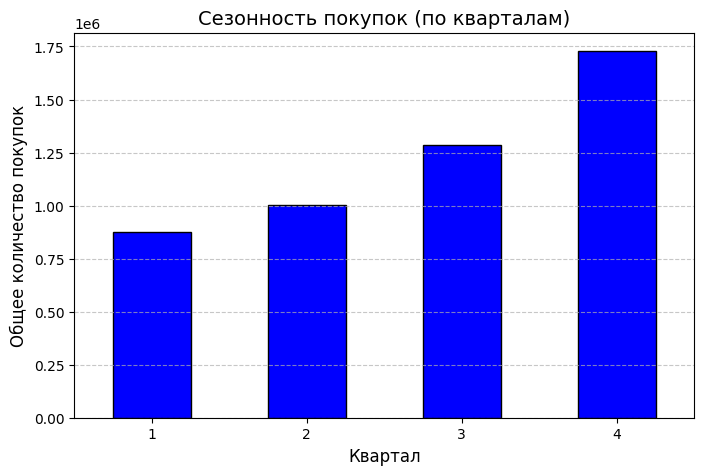

In [6]:
#Присутствует ли в продажах сезонность (когда покупают чаще)?

seasonality =data.groupby(data['InvoiceDate'].dt.quarter)['Quantity'].sum()

# Визуализация
plt.figure(figsize=(8, 5))
seasonality.plot(kind='bar', color='blue')

plt.xlabel("Квартал", fontsize=12)
plt.ylabel("Общее количество покупок", fontsize=12)
plt.title("Сезонность покупок (по кварталам)", fontsize=14)
plt.xticks(rotation=0)  # Подписи оставим горизонтальными
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Выводы по графику :      
Существует сезонность при закупке товаров. Самый большой объем игрушек замечаю в 4-м квартале. В этих последних 3-х месяцах года много масштабных праздников (рождество к примеру), черная пятница. Скорее всего этим вызваны подобные объемы закупок.

Топ 10 стран с наибольшей сезонной выручкой : 
Country
United Kingdom    2289835.25
Netherlands         86501.16
Germany             69279.86
France              65754.95
EIRE                64147.43
Australia           25184.60
Japan               16178.90
Switzerland         15965.87
Norway              15657.05
Belgium             13435.48
Name: TotalPrice, dtype: float64


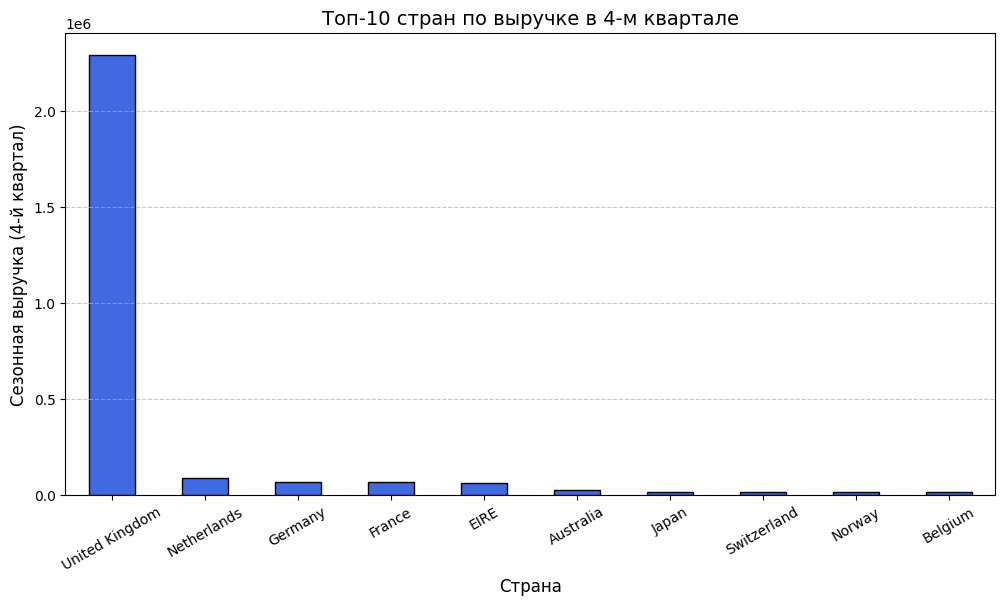

In [7]:
#Какие страны приносят наибольшую сезонную выручку?
q4_data = data[data['InvoiceDate'].dt.quarter == 4]

# Группируем по странам и считаем суммарную выручку
seasonal_revenue = q4_data.groupby('Country')['TotalPrice'].sum()

# Сортируем страны по убыванию выручки
seasonal_max_volume = seasonal_revenue.sort_values(ascending=False)

# Выводим топ-10 стран с наибольшей сезонной выручкой
print(f'Топ 10 стран с наибольшей сезонной выручкой : \n{seasonal_max_volume.head(10)}')


# Визуализируем данные
plt.figure(figsize=(12, 6))
seasonal_max_volume.head(10).plot(kind='bar', color='royalblue')

plt.xlabel("Страна", fontsize=12)
plt.ylabel("Сезонная выручка (4-й квартал)", fontsize=12)
plt.title("Топ-10 стран по выручке в 4-м квартале", fontsize=14)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Выводы по графику:     
Картина здесь очевидна. Самая большая вырука у Соединенного Королевства.
Дальше все страны сильно уступают первой.

In [8]:
# Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час.
# Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
data['Date'] = data['InvoiceDate'].dt.date  # Извлекаем дату
data['Hour'] = data['InvoiceDate'].dt.hour  # Извлекаем час

# Группируем по дате и часу, считаем количество заказов
order_counts = data.groupby(['Date', 'Hour'])['InvoiceNo'].nunique()
order_counts
# Преобразуем в таблицу (чтобы было удобно визуализировать)
order_counts_table = order_counts.unstack()

# Выводим результат
print(order_counts_table)

Hour        6    7    8     9     10    11    12    13    14    15    16  \
Date                                                                       
2010-12-01 NaN  NaN  6.0  16.0  11.0  12.0  23.0  12.0   8.0  14.0  16.0   
2010-12-02 NaN  2.0  6.0   8.0  15.0  10.0  19.0  13.0  12.0  20.0  12.0   
2010-12-03 NaN  NaN  NaN   5.0   6.0   4.0  11.0   7.0  11.0   7.0   5.0   
2010-12-05 NaN  NaN  NaN   NaN   8.0  15.0  22.0  17.0   9.0  15.0   4.0   
2010-12-06 NaN  NaN  4.0   4.0  12.0  13.0  20.0  16.0  14.0  14.0   2.0   
...         ..  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
2011-12-05 NaN  NaN  3.0   6.0  10.0  12.0  19.0  18.0  17.0  12.0  24.0   
2011-12-06 NaN  NaN  4.0  13.0  18.0  22.0  27.0  13.0  19.0   9.0   7.0   
2011-12-07 NaN  NaN  8.0   8.0   8.0  13.0  26.0  13.0  12.0  13.0   7.0   
2011-12-08 NaN  NaN  1.0  10.0  11.0  16.0  19.0  18.0   8.0  15.0   6.0   
2011-12-09 NaN  NaN  4.0  12.0   8.0   8.0  13.0   NaN   NaN   NaN   NaN   

Hour       

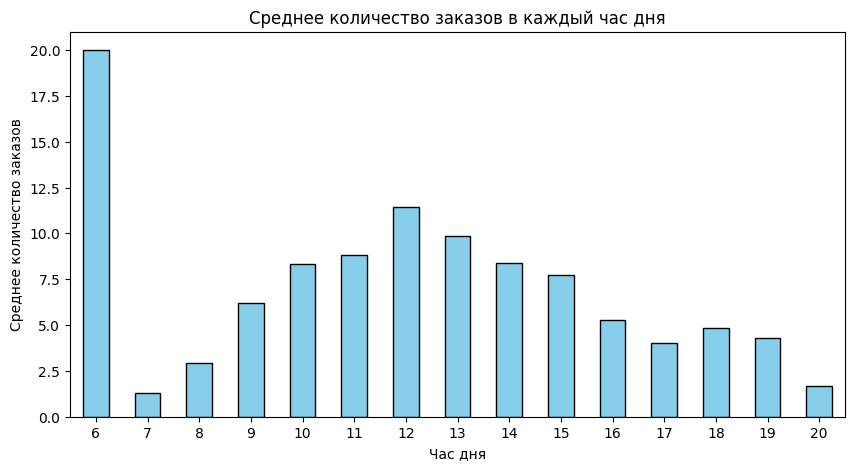

In [9]:
# Находим среднее количество заказов для каждого часа за все дни
avg_orders_per_hour_per_day = order_counts_table.mean(axis=0)

plt.figure(figsize=(10, 5))
avg_orders_per_hour_per_day.plot(kind='bar', color='skyblue')

plt.xlabel("Час дня")
plt.ylabel("Среднее количество заказов")
plt.title("Среднее количество заказов в каждый час дня")
plt.xticks(rotation=0)

plt.show()

Выводы по графику:     
Самый большой и явный пик среднее по количеству заказов по часовому расспределению  замечаем в 6 часов утра.     
могу предположить,за производитель находится в лругом часовом полушарии и за разницы времени происходит данный скачок.     
Следующие часы от 7:00-20:00 распределены по нормальному Гауссовкому распределению. Ничего выдающегося не замечаю.


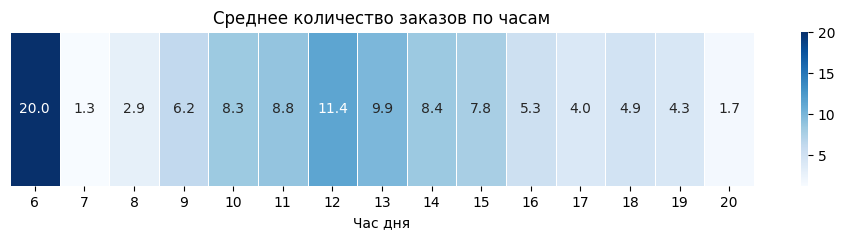

In [10]:
# Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции
order_counts = data.groupby(['Date', 'Hour'])['InvoiceNo'].nunique()

# Вычисляем среднее количество заказов в каждый час за все дни
daily_mean_invoice = order_counts.groupby('Hour').mean()


# Преобразуем Series в DataFrame для heatmap
heatmap_data = daily_mean_invoice.to_frame().T  # Делаем DataFrame с одной строкой

plt.figure(figsize=(12, 2))  # Делаем график вытянутым по горизонтали
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5, cbar=True)

# Настройки осей
plt.xlabel("Час дня")
plt.yticks([])  # Убираем оси Y, т.к. у нас только одна строка
plt.title("Среднее количество заказов по часам")

plt.show()


Выводы по графику:       
Как и ожидалось, самое больше среднее значение по количеству заказов по часам зафиксировано в 6 утра.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM.

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [11]:
# Указываем точку отсчёта
t0 = pd.Timestamp("2011-12-10 00:00:00")

# Группируем данные по клиенту и вычисляем RFM
rfm_table = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (t0 - x.max()).days,  # Recency (кол-во дней с последней покупки)
    'InvoiceNo': 'nunique',  # Frequency (количество уникальных заказов)
    'TotalPrice': 'sum'  # Monetary (с учётом возвратов)
})

# Переименовываем столбцы
rfm_table.columns = ['Recency', 'Frequency', 'Monetary']

# Выводим результат
print(rfm_table.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           325          2 -77183.60
12347             2          7   4310.00
12348            75          4   1437.24
12349            18          1   1457.55
12350           310          1    294.40


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [12]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [13]:
# Определяем 95-й перцентиль для Frequency и Monetary
freq_threshold = rfm_table['Frequency'].quantile(0.95)
monetary_threshold = rfm_table['Monetary'].quantile(0.95)

# Фильтруем данные, оставляя клиентов ниже этих порогов и исключая клиентов с отрицательной Monetary
rfm_filtered = rfm_table[
    (rfm_table['Frequency'] <= freq_threshold) &
    (rfm_table['Monetary'] > 0) &  # Исключаем возвраты (Monetary <= 0)
    (rfm_table['Monetary'] <= monetary_threshold)  # Оставляем только 95% нормальных значений
]

In [14]:
rfm_filtered

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
12352,36,8,1145.08
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,175.15


In [15]:
boxes = [px.box(rfm_filtered, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга).

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


Оптимальное число кластеров (PCA): 3
KMeans Silhouette Score (PCA): 0.6682169407919646
Agglomerative Silhouette Score (PCA): 0.6682169407919646
DBSCAN Silhouette Score (PCA): 0.6485551369092083


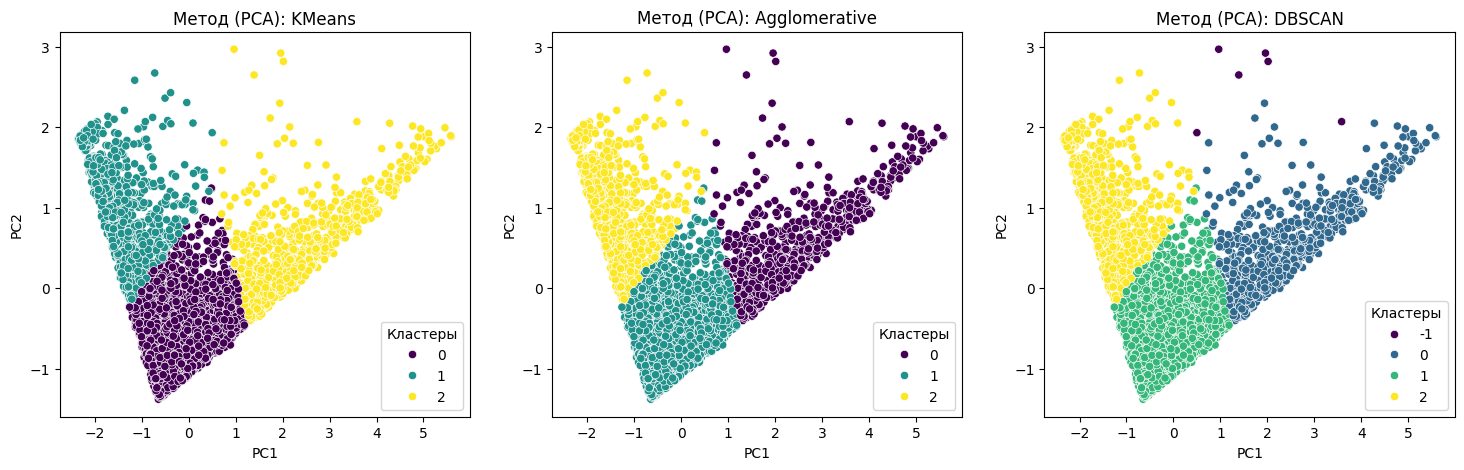

In [16]:
# Стандартизация данных
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered)

# Применяем PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'], index=rfm_filtered.index)

# Подбор оптимального количества кластеров
cluster_range = range(3, 11)
silhouette_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_pca_df)
    score = silhouette_score(rfm_pca_df, cluster_labels)
    silhouette_scores[n_clusters] = score

best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Оптимальное число кластеров (PCA): {best_n_clusters}')

# Кластеризация
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)

rfm_pca_df['KMeans'] = kmeans.fit_predict(rfm_pca_df)
rfm_pca_df['Agglomerative'] = agglomerative.fit_predict(rfm_pca_df)
rfm_pca_df['DBSCAN'] = dbscan.fit_predict(rfm_pca_df)

# Silhouette Score
print(f"KMeans Silhouette Score (PCA): {silhouette_score(rfm_pca_df, rfm_pca_df['KMeans'])}")
print(f"Agglomerative Silhouette Score (PCA): {silhouette_score(rfm_pca_df, rfm_pca_df['Agglomerative'])}")

if len(set(rfm_pca_df['DBSCAN'])) > 1:
    print(f"DBSCAN Silhouette Score (PCA): {silhouette_score(rfm_pca_df, rfm_pca_df['DBSCAN'])}")
else:
    print("DBSCAN Silhouette Score (PCA): Невозможно вычислить (все точки в одном кластере)")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(['KMeans', 'Agglomerative', 'DBSCAN']):
    sns.scatterplot(x='PC1', y='PC2', hue=method, data=rfm_pca_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Метод (PCA): {method}')
    axes[i].legend(title='Кластеры')

plt.show()


Оптимальное число кластеров (t-SNE): 10
KMeans Silhouette Score (t-SNE): 0.43357971656711075
Agglomerative Silhouette Score (t-SNE): 0.41100769075632054
DBSCAN Silhouette Score (t-SNE): -0.5681451375132328


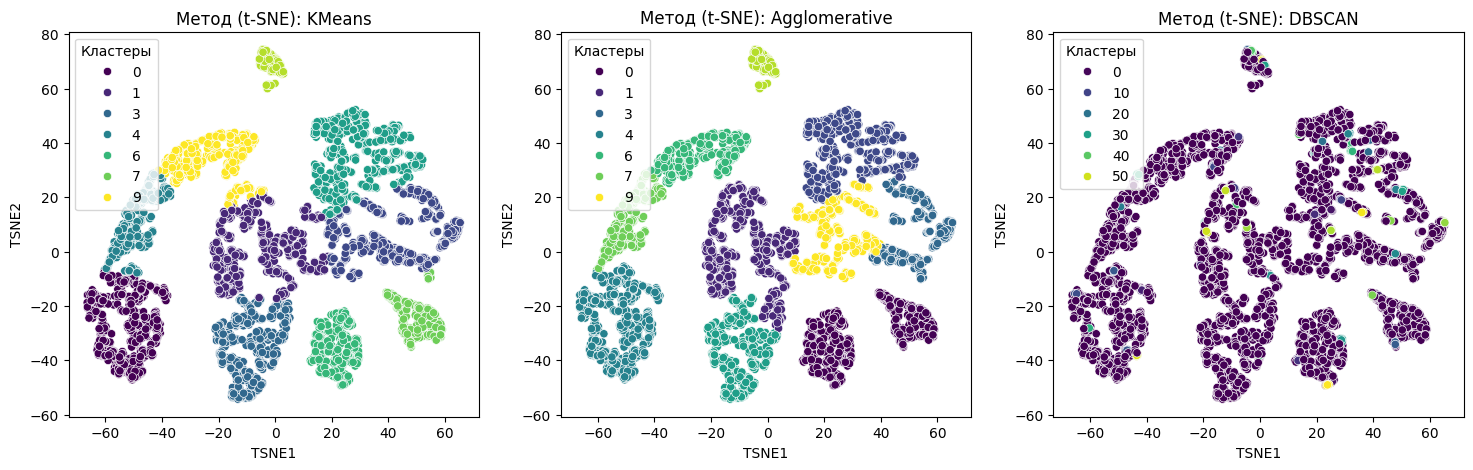

In [17]:
# Применяем t-SNE
tsne = TSNE(n_components=2, random_state=42)
rfm_tsne = tsne.fit_transform(rfm_scaled)
rfm_tsne_df = pd.DataFrame(rfm_tsne, columns=['TSNE1', 'TSNE2'], index=rfm_filtered.index)

# Подбор оптимального количества кластеров
silhouette_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_tsne_df)
    score = silhouette_score(rfm_tsne_df, cluster_labels)
    silhouette_scores[n_clusters] = score

best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Оптимальное число кластеров (t-SNE): {best_n_clusters}')

# Кластеризация
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)

rfm_tsne_df['KMeans'] = kmeans.fit_predict(rfm_tsne_df)
rfm_tsne_df['Agglomerative'] = agglomerative.fit_predict(rfm_tsne_df)
rfm_tsne_df['DBSCAN'] = dbscan.fit_predict(rfm_tsne_df)

# Silhouette Score
print(f"KMeans Silhouette Score (t-SNE): {silhouette_score(rfm_tsne_df, rfm_tsne_df['KMeans'])}")
print(f"Agglomerative Silhouette Score (t-SNE): {silhouette_score(rfm_tsne_df, rfm_tsne_df['Agglomerative'])}")

if len(set(rfm_tsne_df['DBSCAN'])) > 1:
    print(f"DBSCAN Silhouette Score (t-SNE): {silhouette_score(rfm_tsne_df, rfm_tsne_df['DBSCAN'])}")
else:
    print("DBSCAN Silhouette Score (t-SNE): Невозможно вычислить (все точки в одном кластере)")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(['KMeans', 'Agglomerative', 'DBSCAN']):
    sns.scatterplot(x='TSNE1', y='TSNE2', hue=method, data=rfm_tsne_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Метод (t-SNE): {method}')
    axes[i].legend(title='Кластеры')

plt.show()


Оптимальное число кластеров: 10
KMeans Silhouette Score: 0.7298222682578268
Agglomerative Silhouette Score: 0.7255828662893261
DBSCAN Silhouette Score: 0.7441731840353244


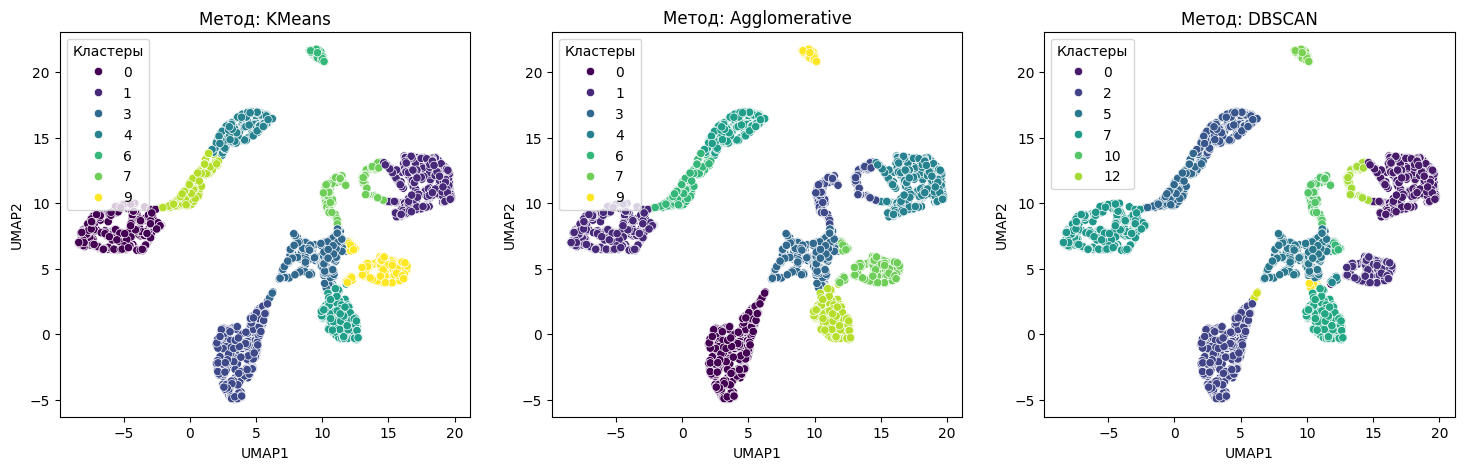

In [18]:
# Стандартизация данных
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_filtered)

# Применяем UMAP для уменьшения размерности до 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
rfm_umap = umap_model.fit_transform(rfm_scaled)

# Преобразуем в DataFrame
rfm_umap_df = pd.DataFrame(rfm_umap, columns=['UMAP1', 'UMAP2'], index=rfm_filtered.index)

# Подбор оптимального количества кластеров
cluster_range = range(3, 11)
silhouette_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_umap_df)
    score = silhouette_score(rfm_umap_df, cluster_labels)
    silhouette_scores[n_clusters] = score

# Оптимальное количество кластеров
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f'Оптимальное число кластеров: {best_n_clusters}')

# Применяем 3 метода кластеризации
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
agglomerative = AgglomerativeClustering(n_clusters=best_n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)

rfm_umap_df['KMeans'] = kmeans.fit_predict(rfm_umap_df)
rfm_umap_df['Agglomerative'] = agglomerative.fit_predict(rfm_umap_df)
rfm_umap_df['DBSCAN'] = dbscan.fit_predict(rfm_umap_df)

# Вычисляем и выводим силуэтные коэффициенты для каждого метода
print(f"KMeans Silhouette Score: {silhouette_score(rfm_umap_df, rfm_umap_df['KMeans'])}")
print(f"Agglomerative Silhouette Score: {silhouette_score(rfm_umap_df, rfm_umap_df['Agglomerative'])}")

# Для DBSCAN может не быть силуэтного коэффициента (из-за выбросов, помеченных как -1)
if len(set(rfm_umap_df['DBSCAN'])) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(rfm_umap_df, rfm_umap_df['DBSCAN'])}")
else:
    print("DBSCAN Silhouette Score: Невозможно вычислить (все точки в одном кластере)")

# Визуализация кластеров
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(['KMeans', 'Agglomerative', 'DBSCAN']):
    sns.scatterplot(x='UMAP1', y='UMAP2', hue=method, data=rfm_umap_df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Метод: {method}')
    axes[i].legend(title='Кластеры')

plt.show()


Были проведены 3 вида понижении размерности (PCA, tSNe, umap)      
После, каждый отдельный метод был применен к трем видам класстеризации:
1. Kmeans
2. Agglomerative
3. DBSCAN    

В итоге, алгоритм с наибольшим коэффициентом силуэта = 0.7298 показал     
алгоритм **Kmeans** c оптимальным количеством кластеров =10   
совместно с методом понижение размерности **umap**.

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [19]:

# Создаем 3D-диаграмму с кластерами KMeans
fig = px.scatter_3d(
    rfm_filtered,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color =rfm_umap_df['KMeans'].astype(str),  # Цвет по кластерам KMeans
    title="Кластеры клиентов (RFM-анализ)",
    labels={'color': 'Кластер'}
)

fig.show()


1. Тускло красный кластер (кластер 0 ) - клиенты с самой низкой частотой, низкой денежной ценностью, но не так давно купившие. Скорее всего это те клиенты, которые преобретали товар на пробу.
2. Фиолетовый кластер (кластер 1) – клиенты с самыми лучшими показателями. Это яльные клиенты, которые часто покупают и приносят большую прибыль.
3. Зеленый кластер (кластер 2) – клиенты, давно не покупавшие. Доходность от них средняя, как и частота покупок. Эти люди в зоне риска.
4. Голубой кластер (кластер 3) – клиенты с высокой доходностью и средней частотностью, но покупавшие давно. Это лояльные когда-то клиенты, которые по какой-то причине перестали покупать у нас. В зоне потери.
5. Ярко фиолетовый кластер (кластер 4) - клиенты, с низкой доходностью и частотой. Но самое важно,что они покупали очень давно.
6. Салатовый кластер ( кластер 5) - клиенты с средней частотой и доходностью, но купившие недавно либо 3 месяца назад. В зоне риска
7. Желтый кластер (кластер 6) – клиенты с самой низкой активностью. Скорее всего, это отток клиентов, которые уже ушли.
8. Розовый кластер (кластер 7) – клиенты со средней частотой покупок и ценностью  чуть выше среднего, купившиене не так давно. Это перспективные клиенты.
9. Оранжевый кластер (кластер 8) – редкие покупатели с небольшими тратами. Возможно, это клиенты, которых стоит вернуть с помощью маркетинговых акций.
10. Красный кластер (кластер 9) – пользователи купившие максимум 2 месяца назад, со редней частотой и низкой монетаризацией. Это могут быть новые клиенты или разовые покупатели.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [21]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [22]:
rfm_filtered['Cluster'] = rfm_umap_df['KMeans']  # cluster_labels — это предсказанные метки кластеров

# 2️⃣ Группируем по кластерам и считаем средние значения RFM-признаков
grouped_data = rfm_filtered.groupby('Cluster').mean()


plot_cluster_profile(grouped_data= grouped_data, n_clusters=10)


1. Кластер 0 - Скорее всего это те клиенты, которые преобретали товар на пробу.
2. Кластер 1 – Это лояльные клиенты, которые часто покупают и приносят большую прибыль.
3. Кластер 2 - Клиенты в зоне риска со средним доходом. необходимо их взбодрить и вернуть их к покупкам б возможно увеличив при жтом их средний чек.
4. Кластер 3 – Лояльные клиенты, с хорошей доходностью, но давно покупавшие. Необходимо узнать по какой причине перестали приобретать товар. Также проверить рынок конкурентов, что-то могло измениться за этот период.
5. Кластер 4 - Клиенты с малой заинтересованностью, давно покупавшие. Необходимо проверить % таких людей от общего количества клиентов и если процент небольшой, можно оставить без внимания.
6. Кластер 5 - Клиенты в зоне риска. Необходимо чаще высылать им наши предложения через e-mail маркеинговый отдел, есть потенциал  повысить усредний чек, если реанимировать их.
7. Кластер 6 – Скорее всего, это отток клиентов, которые уже ушли.
8. Кластер 7 - Это перспективные клиенты. Нужно присылать им новые предложения. Скидок прелагать по-меньше, чтобы не демпинговать саобственную компанию.
9. Кластер 8 – Редкие клиенты с небольшой ценностью. много внимание не уделять.Эту категорию клиентов можно отнести ко всем промоакциям,которые у нас есть. Возможно что-то их заинтересует.
10. Кластер 9 - Это могут быть новые клиенты или разовые покупатели. Эти люди попали так сказать в песочницу. От дальнейших шащов маркетинга зависит в какую когорь=ту перейдут данные клиенты - в перспективные либо ушедшие.

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).


Выводы о проделанной работе:       
Была поставлена задача разделить клиентов на сегменты по покупательской способности.

Для решения данного проекта был выбран метод RFM, который заключается в группировке клиентов на основе следующих параметров:

- Recency (Давность) — давность последней покупки клиента.
- Frequency (Частота) — общее количество покупок клиента.
- Monetary Value (Денежная ценность) — сколько денег потратил клиент.     


Проделанная работа:     
Перед формированием кластеров были выполнены следующие этапы:  

1. Предварительная очистка данных (поиск пропусков, дубликатов и т. д.).
2. Разведывательный анализ данных: выявлены основные закономерности, сформированы новые признаки, устранены зависимые данные, построены графики для лучшего понимания клиентов и их потребностей.
3. Стандартизация, снижение размерности и удаление выбросов для подготовки данных к кластеризации.     

Применены три метода кластеризации и получены итоговые сегменты клиентов.
Результаты кластеризации    
В результате проделанной работы были выделены следующие сегменты клиентов:

1. Кластер 0 - Скорее всего это те клиенты, которые преобретали товар на пробу.
2. Кластер 1 – Это лояльные клиенты, которые часто покупают и приносят большую прибыль.
3. Кластер 2 - Клиенты в зоне риска со средним доходом. необходимо их взбодрить и вернуть их к покупкам б возможно увеличив при жтом их средний чек.
4. Кластер 3 – Лояльные клиенты, с хорошей доходностью, но давно покупавшие. Необходимо узнать по какой причине перестали приобретать товар. Также проверить рынок конкурентов, что-то могло измениться за этот период.
5. Кластер 4 - Клиенты с малой заинтересованностью, давно покупавшие. Необходимо проверить % таких людей от общего количества клиентов и если процент небольшой, можно оставить без внимания.
6. Кластер 5 - Клиенты в зоне риска. Необходимо чаще высылать им наши предложения через e-mail маркеинговый отдел, есть потенциал  повысить усредний чек, если реанимировать их.
7. Кластер 6 – Скорее всего, это отток клиентов, которые уже ушли.
8. Кластер 7 - Это перспективные клиенты. Нужно присылать им новые предложения. Скидок прелагать по-меньше, чтобы не демпинговать саобственную компанию.
9. Кластер 8 – Редкие клиенты с небольшой ценностью. много внимание не уделять.Эту категорию клиентов можно отнести ко всем промоакциям,которые у нас есть. Возможно что-то их заинтересует.
10. Кластер 9 - Это могут быть новые клиенты или разовые покупатели. Эти люди попали так сказать в песочницу. От дальнейших шащов маркетинга зависит в какую когорь=ту перейдут данные клиенты - в перспективные либо ушедшие.


Дальнейшие шаги:    

Отчёт передаётся в маркетинговый отдел для составления стратегического плана по поддержанию лояльности клиентов из разных сегментов.   

Спасибо за внимание!